<a href="https://colab.research.google.com/github/internship-kaard/zenteiq-kaard/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Develop a machine learning model that can predict student dropout rates or academic success based on a variety of factors, such as attendance, grades, and demographic data. The model should be able to identify students who are at risk of dropping out or falling behind and provide targeted interventions and support.**

In [630]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [631]:
#data loading
df = pd.read_csv('dataset.csv')
#view the data
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.00,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.67,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.00,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.40,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.00,0,13.9,-0.3,0.79,Graduate


In [632]:
#finding null
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [633]:
#finding duplicates
df.duplicated().sum()

0

In [634]:
#EDA - Exploratory Data Analysis
##dimension of the dataframe
df.shape

(4424, 37)

In [635]:
##basic information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [636]:
##statistical summary
from pandas.io.formats.format import set_option
set_option('display.precision',2)
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,...,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4.42e+03
mean,1.18,18.67,1.73,8856.64,0.89,4.58,132.61,1.87,19.56,22.28,...,0.14,0.54,6.23,8.06,4.44,10.23,0.15,11.57,1.23,1.97e-03
std,0.61,17.48,1.31,2063.57,0.31,10.22,13.19,6.91,15.60,15.34,...,0.69,1.92,2.20,3.95,3.01,5.21,0.75,2.66,1.38,2.27e+00
min,1.00,1.00,0.00,33.00,0.00,1.00,95.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.60,-0.80,-4.06e+00
25%,1.00,1.00,1.00,9085.00,1.00,1.00,125.00,1.00,2.00,3.00,...,0.00,0.00,5.00,6.00,2.00,10.75,0.00,9.40,0.30,-1.70e+00
50%,1.00,17.00,1.00,9238.00,1.00,1.00,133.10,1.00,19.00,19.00,...,0.00,0.00,6.00,8.00,5.00,12.20,0.00,11.10,1.40,3.20e-01
75%,1.00,39.00,2.00,9556.00,1.00,1.00,140.00,1.00,37.00,37.00,...,0.00,0.00,7.00,10.00,6.00,13.33,0.00,13.90,2.60,1.79e+00
max,6.00,57.00,9.00,9991.00,1.00,43.00,190.00,109.00,44.00,44.00,...,12.00,19.00,23.00,33.00,20.00,18.57,12.00,16.20,3.70,3.51e+00


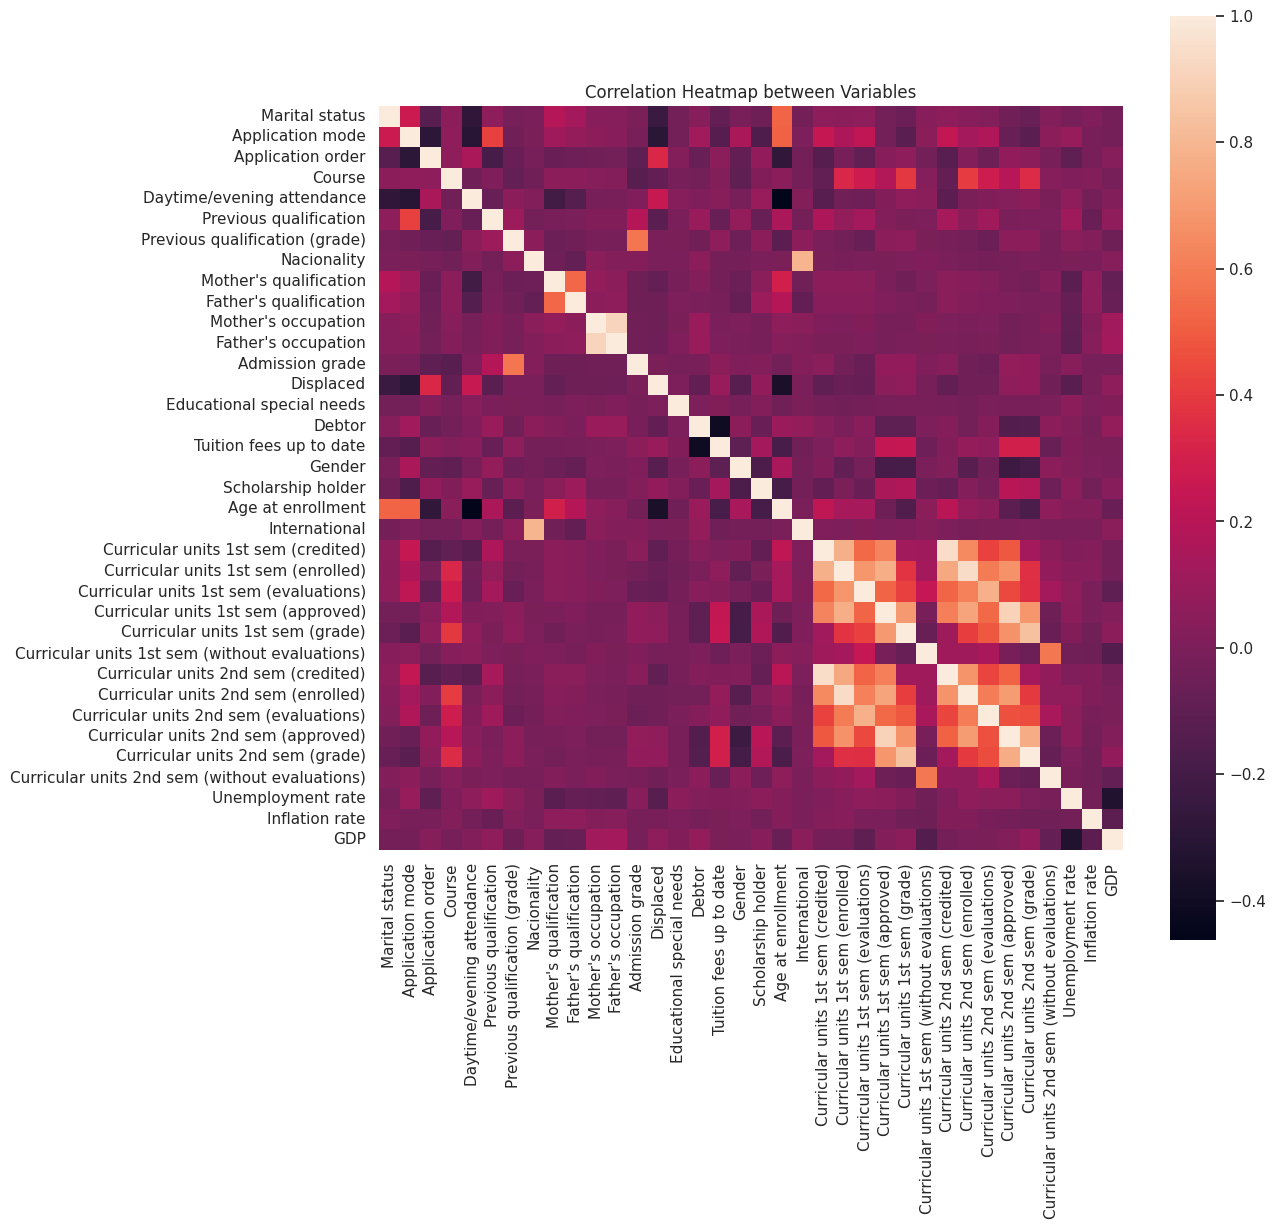

In [637]:
# finding correlations between attributes
# Computing the correlation matrix
corr = df.corr(numeric_only=True)

# Setting up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 12))

# Drawing the heatmap
sns.heatmap(corr, square=True)

plt.title("Correlation Heatmap between Variables")
plt.show()

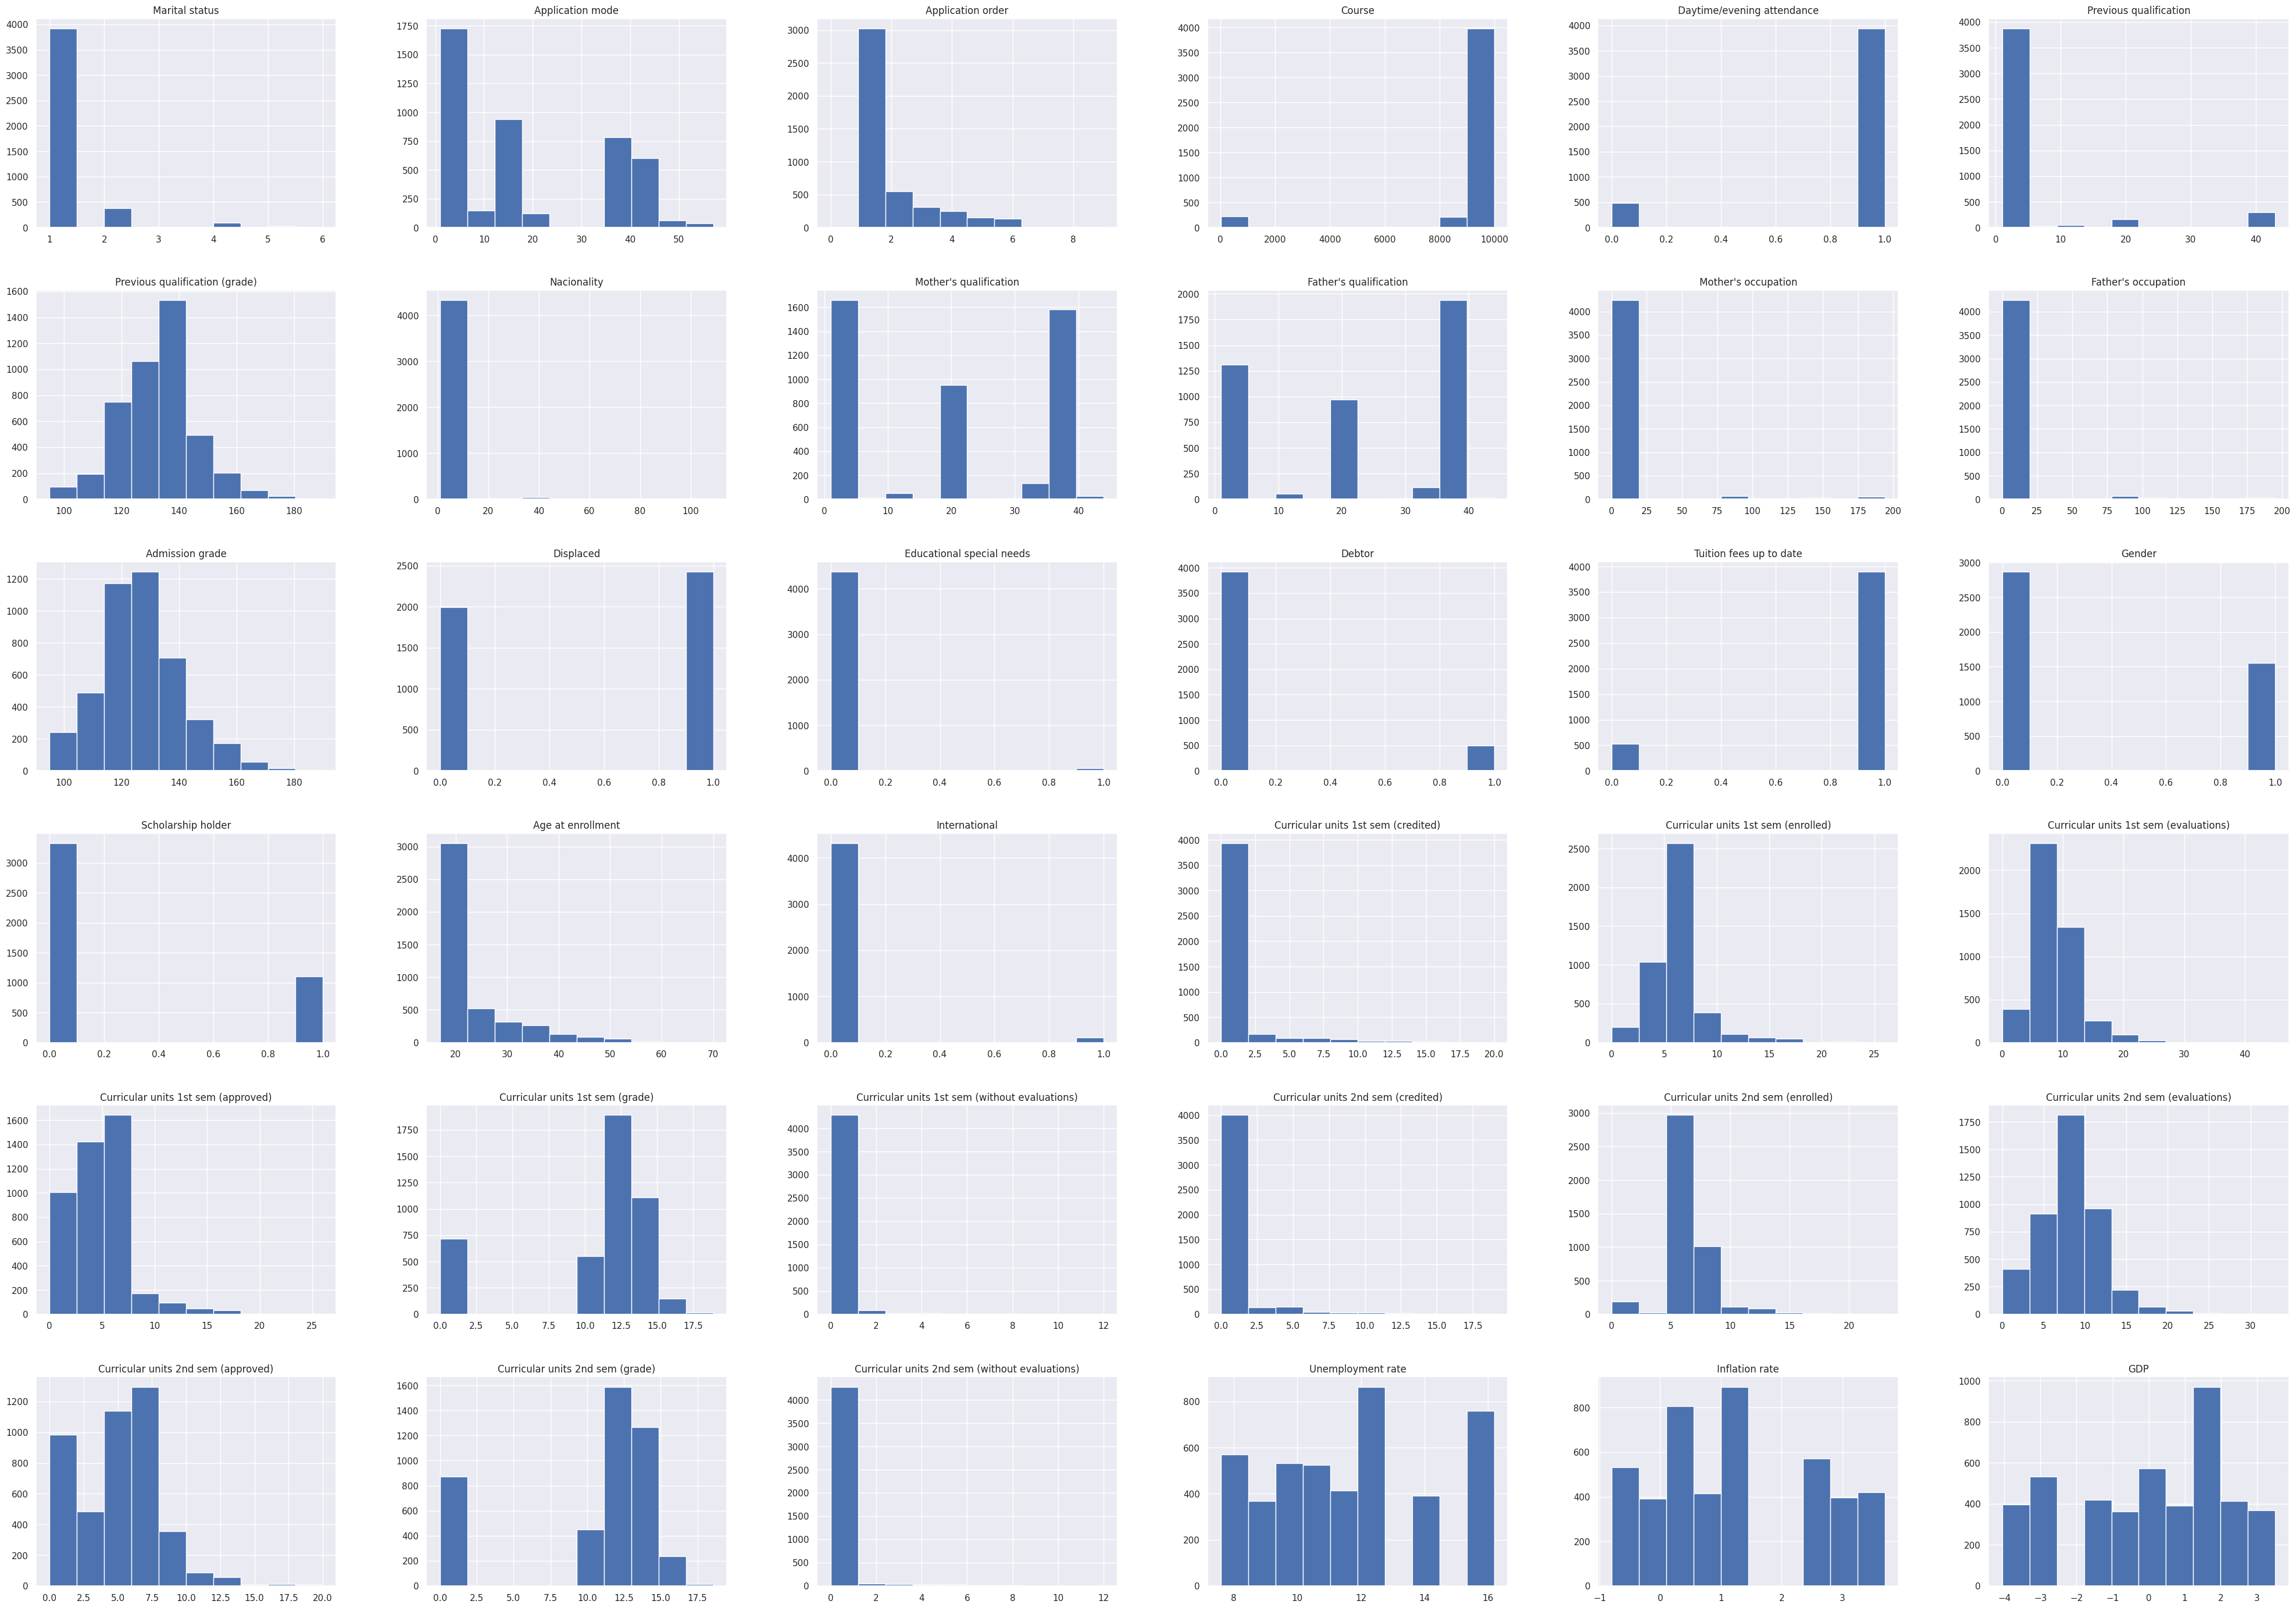

In [638]:
##histogram - visual representation
sns.set_theme(style = 'darkgrid')
df.hist(bins=10, figsize=(50, 35), grid=True, legend=None);

In [639]:
list(df)

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rat

In [640]:
df.describe(include='all').loc['unique', :]

Marital status                                    NaN
Application mode                                  NaN
Application order                                 NaN
Course                                            NaN
Daytime/evening attendance                        NaN
Previous qualification                            NaN
Previous qualification (grade)                    NaN
Nacionality                                       NaN
Mother's qualification                            NaN
Father's qualification                            NaN
Mother's occupation                               NaN
Father's occupation                               NaN
Admission grade                                   NaN
Displaced                                         NaN
Educational special needs                         NaN
Debtor                                            NaN
Tuition fees up to date                           NaN
Gender                                            NaN
Scholarship holder          

In [641]:
df['International'].unique()

array([0, 1])

In [642]:
df['Marital status'].unique()

array([1, 2, 4, 3, 5, 6])

In [643]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [644]:
df.loc[:,'Gender'].value_counts()

0    2868
1    1556
Name: Gender, dtype: int64

In [645]:
df.loc[:,'Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

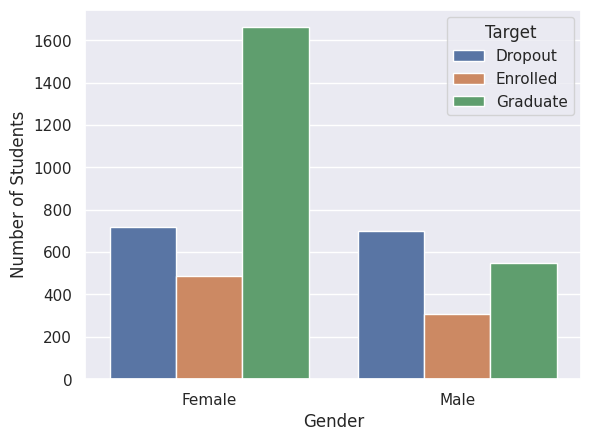

In [646]:
#Genderwise no of students counting
sns.countplot(data=df, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()

In [647]:
df.loc[:,'Marital status'].value_counts()

1    3919
2     379
4      91
5      25
6       6
3       4
Name: Marital status, dtype: int64

In [648]:
df.loc[:,'Application mode'].value_counts()

1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: Application mode, dtype: int64

In [649]:
df.loc[:,'Application order'].value_counts()

1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: Application order, dtype: int64

In [650]:
df.loc[:,'Course'].value_counts()

9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: Course, dtype: int64

In [651]:
df.loc[:,'Daytime/evening attendance'].value_counts()

1    3941
0     483
Name: Daytime/evening attendance, dtype: int64

In [652]:
df.loc[:,'Previous qualification'].value_counts()

1     3717
39     219
19     162
3      126
12      45
40      40
42      36
2       23
6       16
9       11
4        8
38       7
43       6
10       4
15       2
5        1
14       1
Name: Previous qualification, dtype: int64

In [653]:
df.loc[:,'Previous qualification (grade)'].value_counts()

133.1    491
130.0    375
140.0    336
120.0    278
150.0    162
        ... 
133.8      1
175.0      1
117.4      1
188.0      1
126.6      1
Name: Previous qualification (grade), Length: 101, dtype: int64

In [654]:
df.loc[:,'Nacionality'].value_counts()

1      4314
41       38
26       14
22       13
6        13
24        5
100       3
11        3
103       3
21        2
101       2
62        2
25        2
2         2
105       2
32        1
13        1
109       1
108       1
14        1
17        1
Name: Nacionality, dtype: int64

In [655]:
df.loc[:,"Mother's qualification"].value_counts()

1     1069
37    1009
19     953
38     562
3      438
34     130
2       83
4       49
12      42
5       21
40       9
9        8
39       8
41       6
6        4
42       4
43       4
29       3
10       3
11       3
36       3
35       3
30       3
14       2
18       1
22       1
27       1
26       1
44       1
Name: Mother's qualification, dtype: int64

In [656]:
df.loc[:,"Father's qualification"].value_counts()

37    1209
19     968
1      904
38     702
3      282
34     112
2       68
4       39
12      38
39      20
5       18
11      10
36       8
9        5
40       5
22       4
30       4
14       4
29       3
35       2
41       2
43       2
10       2
6        2
26       2
25       1
27       1
33       1
44       1
20       1
42       1
18       1
13       1
31       1
Name: Father's qualification, dtype: int64

In [657]:
df.loc[:,'Admission grade'].value_counts()

130.0    162
140.0    153
120.0    145
100.0    116
150.0     81
        ... 
150.6      1
184.4      1
102.6      1
147.3      1
156.2      1
Name: Admission grade, Length: 620, dtype: int64

In [658]:
df.loc[:,'Displaced'].value_counts()

1    2426
0    1998
Name: Displaced, dtype: int64

In [659]:
df.loc[:,'Educational special needs'].value_counts()

0    4373
1      51
Name: Educational special needs, dtype: int64

In [660]:
df.loc[:,'Debtor'].value_counts()

0    3921
1     503
Name: Debtor, dtype: int64

In [661]:
df.loc[:,'Tuition fees up to date'].value_counts()

1    3896
0     528
Name: Tuition fees up to date, dtype: int64

In [662]:
df.loc[:,'Scholarship holder'].value_counts()

0    3325
1    1099
Name: Scholarship holder, dtype: int64

In [663]:
df.loc[:,'Age at enrollment'].value_counts()

18    1036
19     911
20     599
21     322
22     174
24     131
23     108
26      94
25      93
27      91
28      83
29      66
32      61
34      60
31      55
35      49
30      49
33      45
37      42
39      38
36      35
41      31
38      29
43      25
40      23
45      22
44      21
47      18
50      16
42      13
49      13
46      12
48      11
51       7
54       7
53       7
17       5
55       5
52       4
59       3
58       3
57       2
60       2
61       1
70       1
62       1
Name: Age at enrollment, dtype: int64

In [664]:
df.loc[:,'International'].value_counts()

0    4314
1     110
Name: International, dtype: int64

In [665]:
df.loc[:,'Curricular units 1st sem (credited)'].value_counts()

0     3847
2       94
1       85
3       69
6       51
4       47
7       41
5       41
8       31
9       27
11      17
10      15
14      15
13      13
12      12
15       5
18       4
17       3
16       3
19       2
20       2
Name: Curricular units 1st sem (credited), dtype: int64

In [666]:
df.loc[:,'Curricular units 1st sem (enrolled)'].value_counts()

6     1910
5     1010
7      656
8      296
0      180
12      66
10      52
11      45
9       36
15      25
14      22
4       21
13      20
18      19
17      16
16      13
3       10
2        9
1        7
21       6
19       2
23       2
26       1
Name: Curricular units 1st sem (enrolled), dtype: int64

In [667]:
df.loc[:,'Curricular units 1st sem (evaluations)'].value_counts()

8     791
7     703
6     598
9     402
0     349
10    340
11    239
12    223
5     220
13    140
14    105
15     70
16     47
17     33
18     30
19     23
4      19
21     17
20     12
22     10
23      9
2       8
3       6
24      6
1       6
26      4
25      3
27      2
29      2
45      2
32      1
36      1
31      1
28      1
33      1
Name: Curricular units 1st sem (evaluations), dtype: int64

In [668]:
df.loc[:,'Curricular units 1st sem (approved)'].value_counts()

6     1171
5      723
0      718
7      471
4      433
3      269
2      160
1      127
8      108
11      49
12      44
9       40
13      26
10      24
18      15
14      14
17      10
15       7
16       5
21       4
20       3
19       2
26       1
Name: Curricular units 1st sem (approved), dtype: int64

In [669]:
df.loc[:,'Curricular units 1st sem (grade)'].value_counts()

0.00     718
12.00    205
13.00    147
11.00    138
11.50     89
        ... 
13.04      1
15.66      1
13.33      1
15.03      1
14.91      1
Name: Curricular units 1st sem (grade), Length: 797, dtype: int64

In [670]:
df.loc[:,'Curricular units 1st sem (without evaluations)'].value_counts()

0     4130
1      153
2       79
3       23
4       15
6        6
7        6
5        5
8        4
12       2
10       1
Name: Curricular units 1st sem (without evaluations), dtype: int64

In [671]:
df.loc[:,'Curricular units 2nd sem (credited)'].value_counts()

0     3894
1      107
2       92
4       78
5       68
3       49
6       26
11      20
7       16
9       15
12      14
10      13
8       12
13       9
14       4
15       2
16       2
18       2
19       1
Name: Curricular units 2nd sem (credited), dtype: int64

In [672]:
df.loc[:,'Curricular units 2nd sem (enrolled)'].value_counts()

6     1913
5     1054
8      661
7      304
0      180
11      60
9       50
10      48
12      44
13      37
14      22
4       17
17      12
2        5
19       3
3        3
1        3
15       2
23       2
18       2
16       1
21       1
Name: Curricular units 2nd sem (enrolled), dtype: int64

In [673]:
df.loc[:,'Curricular units 2nd sem (evaluations)'].value_counts()

8     792
6     614
7     563
9     456
0     401
10    355
5     288
11    255
12    226
13    126
14     98
15     73
16     49
17     25
18     22
19     19
4      10
21     10
22     10
20      8
2       4
23      4
26      3
24      3
1       3
3       2
27      2
28      1
25      1
33      1
Name: Curricular units 2nd sem (evaluations), dtype: int64

In [674]:
df.loc[:,'Curricular units 2nd sem (approved)'].value_counts()

6     965
0     870
5     726
4     414
7     331
8     321
3     285
2     198
1     114
11     48
10     38
9      36
12     34
13     21
17      8
14      6
19      3
20      2
16      2
18      2
Name: Curricular units 2nd sem (approved), dtype: int64

In [675]:
df.loc[:,'Curricular units 2nd sem (grade)'].value_counts()

0.00     870
12.00    170
11.00    165
13.00    150
11.50     86
        ... 
13.99      1
11.69      1
15.66      1
13.33      1
11.08      1
Name: Curricular units 2nd sem (grade), Length: 782, dtype: int64

In [676]:
df.loc[:,'Curricular units 2nd sem (without evaluations)'].value_counts()

0     4142
1      140
2       48
3       35
4       21
5       17
6        8
8        6
7        5
12       2
Name: Curricular units 2nd sem (without evaluations), dtype: int64

In [677]:
df.loc[:,'Unemployment rate'].value_counts()

7.6     571
9.4     533
10.8    525
12.4    445
12.7    419
11.1    414
15.5    397
13.9    390
8.9     368
16.2    362
Name: Unemployment rate, dtype: int64

In [678]:
df.loc[:,'Inflation rate'].value_counts()

 1.4    893
 2.6    571
-0.8    533
 0.5    445
 3.7    419
 0.6    414
 2.8    397
-0.3    390
 0.3    362
Name: Inflation rate, dtype: int64

In [679]:
df.loc[:,'GDP'].value_counts()

 0.32    571
-3.12    533
 1.74    525
 1.79    445
-1.70    419
 2.02    414
-4.06    397
 0.79    390
 3.51    368
-0.92    362
Name: GDP, dtype: int64

In [680]:
#labelencoding
df['Target'] = LabelEncoder().fit_transform(df['Target'])

In [681]:
df.loc[:,'Target'].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

In [682]:
# Creating a copy of the dataset
s_df=df.copy()
# Changing the Target to numerical Value 0 or 1. We are predicting if a Student is gonna Dropout or Graduate, ignoring the ones who are Enrolled.
s_df.drop(s_df[s_df["Target"]==1].index, inplace=True)

s_df.loc[:,'Target'].value_counts()

2    2209
0    1421
Name: Target, dtype: int64

In [683]:
# mapping integer codes to new values
mapping = {0: 1, 2: 0}
s_df["Target"] = df["Target"].replace(mapping)

s_df.loc[:,'Target'].value_counts()

0    2209
1    1421
Name: Target, dtype: int64

In [684]:
s_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.00,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.67,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.00,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.40,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.00,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.67,0,15.5,2.8,-4.06,0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.00,0,11.1,0.6,2.02,1
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.50,0,13.9,-0.3,0.79,1
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.00,0,9.4,-0.8,-3.12,0


In [685]:
x = s_df.drop(columns=['Nacionality','International', 'Unemployment rate','GDP','Inflation rate','Age at enrollment', 'Target'], axis=1)
y = s_df["Target"]

In [686]:
#Standardization
scaler = StandardScaler()
scaled = scaler.fit_transform(x)
scaled.shape

(3630, 30)

In [695]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=10)

# Fit logistic regression model on training data
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train.ravel())


# Evaluate performance on testing data
score = logreg.score(X_test, y_test)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

In [696]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9256198347107438


In [689]:
# Calculate the precision of the model
precision = precision_score(y_test, y_pred)

# Print the precision
print("Precision:", precision)

Precision: 0.9282511210762332


In [690]:
# Calculate the recall of the model
recall = recall_score(y_test, y_pred, average='weighted')

# Print the recall
print("Recall:", recall)

Recall: 0.9256198347107438


In [691]:
#calculating f1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 score: {f1}')

F1 score: 0.9247030685500751


<Axes: >

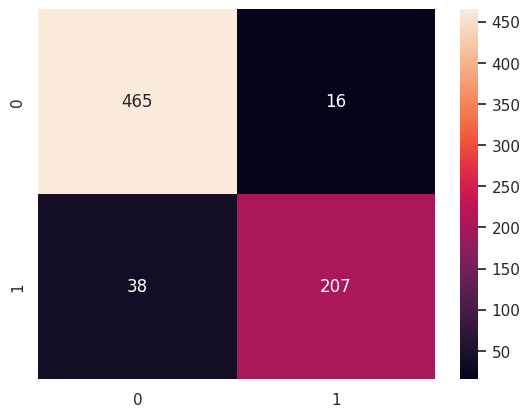

In [692]:
# calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)
# plotting heatmap of confusion matrix
sns.heatmap(cm, annot=True, fmt="d")